# Writing data to and reading data from a Database using Python

## Libraries and settings

In [111]:
# Libraries
import os
import sqlite3
import fnmatch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Function to close a sqlite db-connection
def check_conn(conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

# Get current working directory
print(os.getcwd())

/workspaces/data_analytics/Week_02/Exercises in small classes (submission required)


## Create sqlite data base

In [112]:
# Create data base
conn = sqlite3.connect('apartment_database.db') 
cursor = conn.cursor()

# Show dbs in the directory
flist = fnmatch.filter(os.listdir('.'), '*.db')
for i in flist:
    print(i)

apartment_database.db


## Create SQL-table in the database

In [113]:
cursor.execute('''CREATE TABLE IF NOT EXISTS apartments_table (OrderId VARCHAR(50),
                                                               Adress VARCHAR(200),
                                                               Rooms DECIMAL(8,2),
                                                               Area INT(8),
                                                               Price DECIMAL(8,2))''')
# Confirm changes to the table
conn.commit()

## Read data from file to data frame

In [114]:
#df = pd.read_csv('apartments_data_prepared.csv', 
#                  sep=',', 
#                  encoding='utf-8')[['web-scraper-order', 'address_raw', 'rooms', 'area', 'price']]
#print(df.shape)
#df.head(5)

In [115]:
# Load the CSV data into a DataFrame
df = pd.read_csv('apartments_data_prepared.csv', sep=',', encoding='utf-8')

# Split 'rooms_area_price_raw' into 'rooms', 'area', and 'price' columns
df[['rooms', 'area']] = df['rooms_area_price_raw'].str.extract(r'([\d.,]+)\s+Zimmer,\s+([\d.,]+)\s+m²')

# Extract price from 'price_raw' and save in 'price' column
df['price'] = df['price_raw'].str.extract(r'CHF\s*([\d.,]+)')

# If necessary, convert 'rooms', 'area', and 'price' to appropriate data types (e.g., numeric)
df['rooms'] = pd.to_numeric(df['rooms'].str.replace(',', '.'), errors='coerce')
df['area'] = pd.to_numeric(df['area'].str.replace(',', '.'), errors='coerce')
df['price'] = pd.to_numeric(df['price'].str.replace('.', '').str.replace(',', '.'), errors='coerce')

# Keep only the required columns
df = df[['web-scraper-order', 'address_raw', 'rooms', 'area', 'price']]

# Print the shape of the DataFrame and the first 5 rows to verify
print(df.shape)
df.head(5)


(1008, 5)


,web-scraper-order,address_raw,rooms,area,price
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,1441.0
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,1850.0
2,1693998201-3,"Cramerstrasse 8-12, 8004 Zürich, ZH",NaN,NaN,2686.0
3,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,4853.0
4,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,4335.0


## Write data to the SQL-table in data base

In [116]:
df.to_sql(name = 'apartments_table',
          con = conn,
          index = False,
          if_exists = 'replace')

1008

## Query the SQL-table

In [117]:
# Query the SQL-table
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms >=1''')

df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Address','Rooms','Area','Price'])    
df

,OrderId,Address,Rooms,Area,Price
0,1693998201-1,"Neuhusstrasse 6, 8630 Rüti ZH, ZH",3.0,49.0,1441.0
1,1693998201-2,"Zürcherstrasse 1, 8173 Neerach, ZH",3.5,65.0,1850.0
2,1693998201-4,"Cramerstrasse 8-12, 8004 Zürich, ZH",2.0,54.0,4853.0
3,1693998201-5,"Rotachstrasse 33, 8003 Zürich, ZH",2.0,49.0,4335.0
4,1693998201-16,"Wolframplatz 1, 8045 Zürich, ZH",2.0,32.0,3515.0
...,...,...,...,...,...
868,1693998381-1004,"Hölderlinstrasse 12, 8032 Zürich, ZH",3.5,82.0,2830.0
869,1693998381-1005,"Hegifeldstrasse 70, 8404 Reutlingen (Winterthu...",4.0,73.0,1713.0
870,1693998381-1006,"Holzmoosrütisteig 2b, 8820 Wädenswil, ZH",4.5,110.0,3500.0
871,1693998381-1007,"Vogelbuckstrasse 25, 8307 Effretikon, ZH",3.0,68.0,1650.0


## Plot histogramm of rental prices

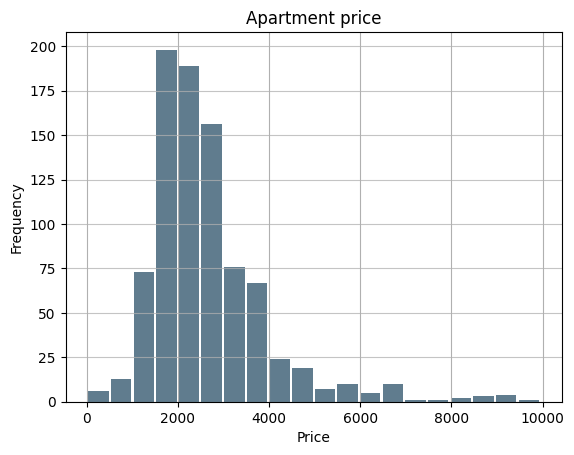

In [118]:
df.Price.plot.hist(grid=True, 
                   bins=20, 
                   rwidth=0.9,
                   color='#607c8e')
plt.title('Apartment price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

Additional SQL-queries

In [119]:
#task 4 c)
# Update the SQL query to filter based on both rooms and area
cursor.execute('''SELECT *
               FROM apartments_table
               WHERE rooms >= 4.0 AND area >= 100''')

# Load the fetched data into a Pandas DataFrame
df = pd.DataFrame(cursor.fetchall(), 
                  columns=['OrderId','Address','Rooms','Area','Price'])

# Display the DataFrame
df

,OrderId,Address,Rooms,Area,Price
0,1693998205-26,"Frowiesstrasse 36, 8344 Bäretswil, ZH",5.5,140.0,2750.0
1,1693998205-27,"Kanzleistrasse 15, 8418 Schlatt ZH, ZH",4.5,104.0,2700.0
2,1693998205-29,"Bolletweg 14, 8934 Knonau, ZH",5.5,150.0,3390.0
3,1693998205-31,"Adlergass 6, 8805 Richterswil, ZH",5.5,165.0,NaN
4,1693998205-33,"Haldenstrasse 67, 8602 Wangen b. Dübendorf, ZH",4.5,118.0,3390.0
...,...,...,...,...,...
234,1693998381-998,"Tösstalstrasse 12, 8492 Wila, ZH",4.5,109.0,1980.0
235,1693998381-999,"Murzlenstrasse 66, 8166 Niederweningen, ZH",4.5,111.0,2700.0
236,1693998381-1001,"Murzlenstrasse 66, 8166 Niederweningen, ZH",4.5,111.0,2800.0
237,1693998381-1006,"Holzmoosrütisteig 2b, 8820 Wädenswil, ZH",4.5,110.0,3500.0


In [120]:
# task 4 d)

cursor.execute('''SELECT rooms, AVG(price)
 FROM apartments_table
 GROUP BY rooms''')

df = pd.DataFrame(cursor.fetchall(),
                  columns=['Rooms', 'Price'])

# Display the DataFrame
df


,Rooms,Price
0,NaN,2756.617188
1,1.0,1309.055556
2,1.5,2057.526316
3,2.0,2193.476190
4,2.5,2460.788079
5,3.0,1998.352941
6,3.5,2656.564655
7,4.0,2763.193548
8,4.5,3074.674286
9,5.0,2801.000000


In [121]:
# task 4 e)

cursor.execute('''SELECT rooms, AVG(area)
 FROM apartments_table
 GROUP BY rooms''')

df = pd.DataFrame(cursor.fetchall(),
                  columns=['Rooms', 'Area'])

# Display the DataFrame
df

,Rooms,Area
0,NaN,NaN
1,1.0,32.092593
2,1.5,35.526316
3,2.0,54.428571
4,2.5,67.317881
5,3.0,68.980392
6,3.5,89.858974
7,4.0,96.129032
8,4.5,114.779661
9,5.0,110.000000


## Close db connection (if open)

In [122]:
# Close db connection (if open)
try:
    if check_conn(conn):
        conn.close()
    else:
        pass
except:
    pass

# Status (True = open, False = closed)
print(check_conn(conn))

False


### Jupyter notebook --footer info-- (please always provide this at the end of each submitted notebook)

In [123]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1012-azure
Datetime: 2023-10-02 14:03:45
Python Version: 3.10.13
-----------------------------------
